# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


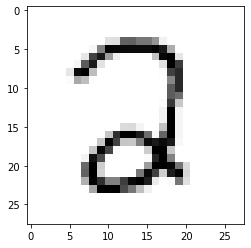

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.2377525667257724
train accuracy is: 0.7318477716574863, test accuracy is 0.7318548387096774


Epoch 10 Loss 0.07444673573438723
train accuracy is: 0.9276414621932899, test accuracy is 0.9334677419354839


Epoch 20 Loss 0.05032075322504384
train accuracy is: 0.9460023368385913, test accuracy is 0.9551411290322581


Epoch 30 Loss 0.041433234776114276
train accuracy is: 0.9550158571190118, test accuracy is 0.9621975806451613


Epoch 40 Loss 0.03660875912903833
train accuracy is: 0.9602737439492572, test accuracy is 0.9647177419354839


Epoch 50 Loss 0.03349998826180057
train accuracy is: 0.9629444166249375, test accuracy is 0.9672379032258065


Epoch 60 Loss 0.03127904035259931
train accuracy is: 0.9650308796528125, test accuracy is 0.96875


Epoch 70 Loss 0.029572826728512403
train accuracy is: 0.9672008012018027, test accuracy is 0.9682459677419355


Epoch 80 Loss 0.028219788627103438
train accuracy is: 0.9688699716241028, test accuracy is 0.9707661290322581


Epoch 90 Loss 0.02710693468402134
train accuracy is: 0.9699549323985979, test accuracy is 0.9702620967741935


Epoch 100 Loss 0.026153181760343123
train accuracy is: 0.970789517609748, test accuracy is 0.969758064516129


Epoch 110 Loss 0.025325793684624457
train accuracy is: 0.971290268736438, test accuracy is 0.9722782258064516


Epoch 120 Loss 0.024581411991316932
train accuracy is: 0.971957936905358, test accuracy is 0.9727822580645161


Epoch 130 Loss 0.023903720111409003
train accuracy is: 0.9728759806376232, test accuracy is 0.9737903225806451


Epoch 140 Loss 0.023312391039097012
train accuracy is: 0.9732098147220831, test accuracy is 0.9742943548387096


Epoch 150 Loss 0.02275208077345371
train accuracy is: 0.9737105658487731, test accuracy is 0.9753024193548387


Epoch 160 Loss 0.02222810643044528
train accuracy is: 0.9747120681021533, test accuracy is 0.9747983870967742


Epoch 170 Loss 0.021738062895438004
train accuracy is: 0.9755466533133033, test accuracy is 0.9742943548387096


Epoch 180 Loss 0.02127050849797675
train accuracy is: 0.9762143214822233, test accuracy is 0.9742943548387096


Epoch 190 Loss 0.02082461976626869
train accuracy is: 0.9769654481722584, test accuracy is 0.9747983870967742


Epoch 200 Loss 0.02040637381957419
train accuracy is: 0.9773827407778334, test accuracy is 0.9747983870967742


Epoch 210 Loss 0.02000001731422593
train accuracy is: 0.9780504089467534, test accuracy is 0.9753024193548387


Epoch 220 Loss 0.019608856374723812
train accuracy is: 0.9786346185945585, test accuracy is 0.9758064516129032


Epoch 230 Loss 0.019230506069702183
train accuracy is: 0.9786346185945585, test accuracy is 0.9758064516129032


Epoch 240 Loss 0.01885726179917066
train accuracy is: 0.9790519112001336, test accuracy is 0.9758064516129032


0.013637334990772736

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.23208763961458434
train accuracy is: 0.7461191787681523, test accuracy is 0.7373991935483871


Epoch 10 Loss 0.09745028719429598
train accuracy is: 0.9204640293773995, test accuracy is 0.9319556451612904


Epoch 20 Loss 0.07610863415215356
train accuracy is: 0.9305625104323152, test accuracy is 0.9405241935483871


Epoch 30 Loss 0.06624408735031058
train accuracy is: 0.9370722750792856, test accuracy is 0.9450604838709677


Epoch 40 Loss 0.060221989612594354
train accuracy is: 0.942580537472876, test accuracy is 0.9516129032258065


Epoch 50 Loss 0.05605836695840553
train accuracy is: 0.9462527124019362, test accuracy is 0.954133064516129


Epoch 60 Loss 0.05296242228489321
train accuracy is: 0.9480053413453514, test accuracy is 0.9561491935483871


Epoch 70 Loss 0.05054985597614866
train accuracy is: 0.9496745117676515, test accuracy is 0.9581653225806451


Epoch 80 Loss 0.04860198282805711
train accuracy is: 0.9517609747955266, test accuracy is 0.9596774193548387


Epoch 90 Loss 0.04698681406301292
train accuracy is: 0.9529293940911367, test accuracy is 0.9611895161290323


Epoch 100 Loss 0.045619526527634235
train accuracy is: 0.9539308963445168, test accuracy is 0.9616935483870968


Epoch 110 Loss 0.04444350389361706
train accuracy is: 0.9546820230345519, test accuracy is 0.9632056451612904


Epoch 120 Loss 0.04341897705373772
train accuracy is: 0.9554331497245869, test accuracy is 0.9637096774193549


Epoch 130 Loss 0.04251287048502711
train accuracy is: 0.9561842764146219, test accuracy is 0.9637096774193549


Epoch 140 Loss 0.0417085434048568
train accuracy is: 0.9567684860624269, test accuracy is 0.9647177419354839


Epoch 150 Loss 0.040985138298143695
train accuracy is: 0.957686529794692, test accuracy is 0.9652217741935484


Epoch 160 Loss 0.04032924633981336
train accuracy is: 0.9581872809213821, test accuracy is 0.9652217741935484


Epoch 170 Loss 0.03973306781958908
train accuracy is: 0.9584376564847271, test accuracy is 0.9647177419354839


Epoch 180 Loss 0.039186062423336235
train accuracy is: 0.9587714905691871, test accuracy is 0.9647177419354839


Epoch 190 Loss 0.038683394448199786
train accuracy is: 0.9589384076114171, test accuracy is 0.9647177419354839


Epoch 200 Loss 0.03821860383058323
train accuracy is: 0.9594391587381071, test accuracy is 0.9647177419354839


Epoch 210 Loss 0.03778634923922105
train accuracy is: 0.9596895343014522, test accuracy is 0.9647177419354839


Epoch 220 Loss 0.03738427238209248
train accuracy is: 0.9601068269070272, test accuracy is 0.9657258064516129


Epoch 230 Loss 0.03700813864476025
train accuracy is: 0.9607744950759473, test accuracy is 0.9657258064516129


Epoch 240 Loss 0.03665466273838694
train accuracy is: 0.9609414121181773, test accuracy is 0.9657258064516129


0.06839981408424851

### Comparing results of NN and LR

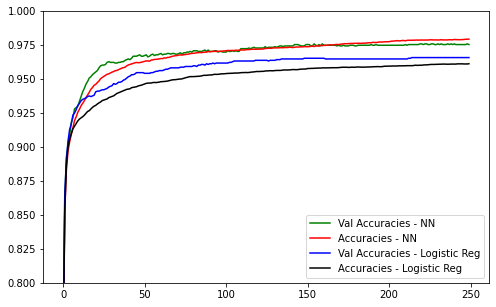

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

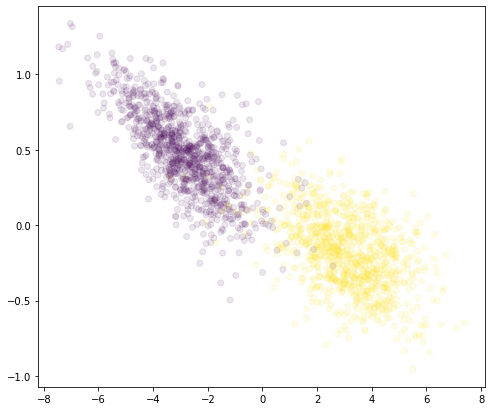

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

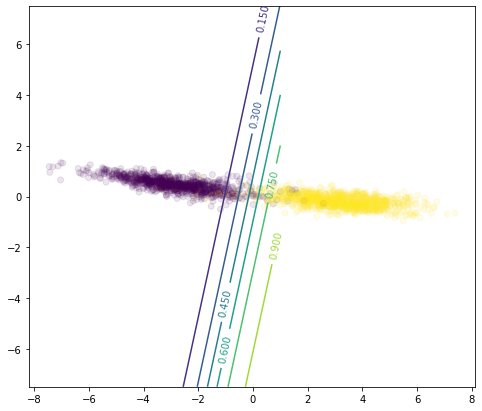

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );